# Análisis Exploratorio y Clasificación del Titanic

## Objetivos del Proyecto

Este proyecto se compone de tres objetivos principales:

1. **Análisis Exploratorio de Datos (EDA)**:
   - Realizar un análisis exploratorio para extraer información significativa de los datos.
   - Identificar las mejores características (features) que se utilizarán para el modelado.

2. **Entrenamiento, Prueba y Refinamiento de Modelos de Clasificación**:
   - Entrenar, probar y refinar varios modelos de clasificación para predecir con mayor precisión qué pasajeros sobrevivieron. Los algoritmos predictivos que se entrenarán son:
     - **Regresión Logística**
     - **K-Vecinos Más Cercanos (KNN)**

3. **Aplicación del Mejor Modelo**:
   - Aplicar el modelo con el mejor rendimiento al conjunto de prueba para la presentación del concurso.

## Descripción de los Algoritmos Utilizados

### Regresión Logística
Un modelo estadístico que se utiliza para predecir el resultado de una variable dependiente categórica basada en una o más variables independientes.

### Clasificador de Vector Soporte (SVC)
Un método de clasificación que utiliza un enfoque geométrico para encontrar el mejor límite (o "hiperplano") que separa las clases de datos.

### Clasificador de Vector Soporte Kernel (Kernel SVC)
Una extensión del SVC que aplica una transformación a los datos originales para permitir la clasificación no lineal.

### K-Vecinos Más Cercanos (KNN)
Un algoritmo en el que la clasificación de una muestra se basa en la mayoría de los votos de sus K vecinos más cercanos en el espacio de características.

### Árbol de Decisión
Un modelo predictivo que utiliza un árbol de decisiones como modelo de clasificación o regresión. Se construye dividiendo los datos en grupos basados en preguntas con respuestas binarias.

### Bosque Aleatorio (Random Forest)
Un método de ensamblaje que utiliza múltiples árboles de decisión para mejorar la precisión del modelo y controlar el sobreajuste.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore') # Ignore warning messages
plt.rcParams["figure.figsize"] = [10,5] # Set the size of the figures

In [3]:
train_data = pd.read_csv('/Users/mdurango/University/MLProyect/dataset/train.csv')

# Descripción de las Features del Dataset del Titanic

# Descripción de las Features del Dataset del Titanic

| **Variable**     | **Descripción**                                                                                       |
|------------------|-------------------------------------------------------------------------------------------------------|
| **PassengerId**  | Esta columna contiene un identificador único para cada pasajero.                                     |
| **Survived**     | Esta columna indica si un pasajero sobrevivió al hundimiento o no. Valor 0 = no sobrevivió, 1 = sobrevivió. |
| **Pclass**       | Esta columna contiene información sobre la clase del pasajero. Valor 1 = primera clase, 2 = segunda clase, 3 = tercera clase. |
| **Name**         | Esta columna presenta el nombre del pasajero.                                                        |
| **Sex**          | Esta columna contiene información sobre el género del pasajero.                                       |
| **Age**          | Esta columna muestra la edad del pasajero.                                                           |
| **SibSp**        | Esta columna proporciona información sobre los hermanos y cónyuges del pasajero.                      |
| **Parch**        | Esta columna ofrece información sobre los padres e hijos del pasajero.                                |
| **Ticket**       | Esta columna contiene el número de ticket del pasajero.                                              |
| **Fare**         | Esta columna muestra la tarifa pagada por el pasajero.                                               |
| **Cabin**        | Esta columna contiene el número de la cabina del pasajero.                                           |
| **Embarked**     | Esta columna indica el puerto de embarque. Valor C = Cherburgo, Q = Queenstown, S = Southampton.    |

In [4]:
print('train data:',train_data.shape)

train data: (891, 12)


In [5]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


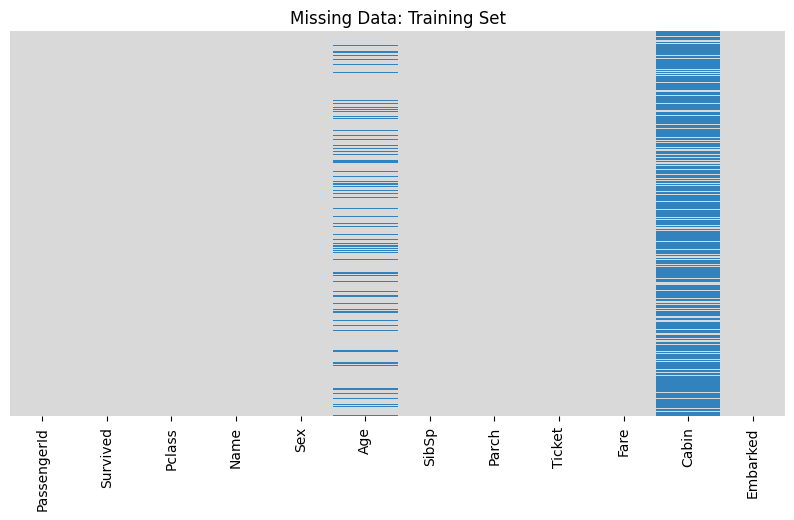

In [6]:
# Heatmap
sns.heatmap(train_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

**nota:** La variable 'Age' tiene aproximadamente un 20% de sus datos faltantes. Esta proporción probablemente sea lo suficientemente pequeña como para permitir reemplazos razonables utilizando alguna forma de imputación (usando el conocimiento de las otras columnas para llenar valores razonables). Sin embargo, falta demasiada información en la columna 'Cabin' para hacer algo útil con ella a un nivel básico. Esta columna puede necesitar ser eliminada del conjunto de datos por completo o cambiarse por otra característica, como 'Cabina Conocida: 1 o 0'.

Queremos completar los datos faltantes de edad en lugar de simplemente eliminar las filas con datos faltantes de edad. Una forma de hacerlo es rellenando con la edad promedio de todos los pasajeros (imputación). Sin embargo, podemos ser más inteligentes acerca de esto y verificar la edad promedio según la clase del pasajero.

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

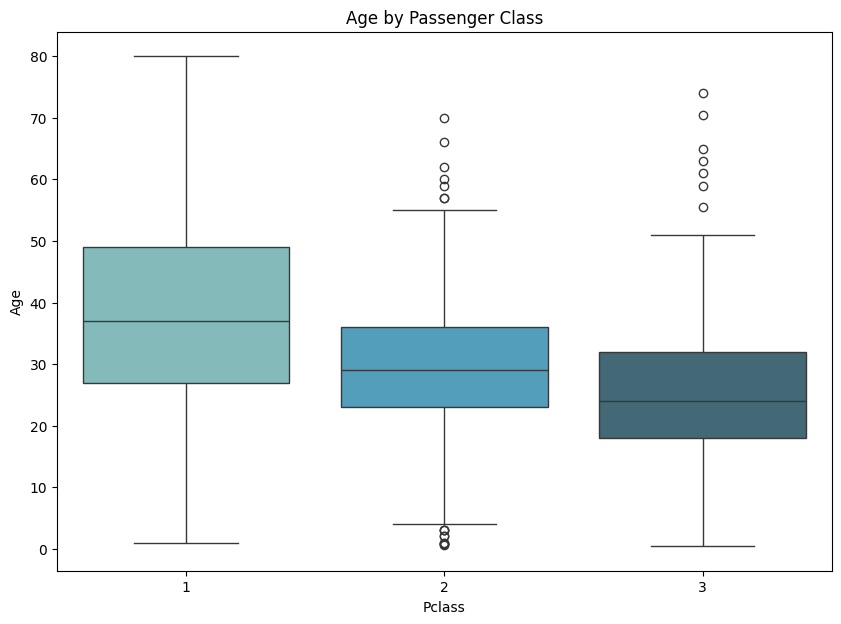

In [8]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train_data, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

In [ ]:
def impute_age(cols):
    """This function imputes the missing values of the Age column based on the values of the Pclass column.

    Parameters:
     - cols: list of columns

    Returns:
        - Age: int

    """
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age

# Apply the function to the Age column
train_data['Age']=train_data[['Age','Pclass']].apply(impute_age, axis=1)

In [10]:
train_data.drop('Cabin', axis = 1, inplace = True) # Drop the Cabin column for the hight number of missing values
train_data.drop('PassengerId', inplace = True, axis = 1) # Drop the PassengerId column because it is not relevant for the analysis

In [11]:
train_data.dropna(inplace = True) # Drop the rows with missing values

In [12]:
print(train_data.info())

# Identify non-null objects
print('\n')
print('Non-Null Objects to Be Converted to Category')
print(train_data.select_dtypes(['object']).columns)

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB
None


Non-Null Objects to Be Converted to Category
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


El nombre (Name) y el ticket (Ticket) pueden ser eliminados del conjunto de datos, ya que estas características no proporcionan información adicional sobre la probabilidad de supervivencia de un pasajero.

Los demás objetos no nulos, como el sexo (Sex) y el puerto de embarque (Embarked), deberán ser especificados como categorías para obtener mejores resultados en análisis posteriores.

In [13]:
# Remove unnecessary columns
train_data.drop(['Name','Ticket'], axis = 1, inplace = True)

# Convert objects to category data type
objcat = ['Sex','Embarked']

for colname in objcat:
    train_data[colname] = train_data[colname].astype('category')

In [14]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,29.019314,13.209814,0.42,22.0000,26.0000,36.5,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


__________
## Paso 1: comprender el problema y definir el objetivo

Survived' es nuestro objetivo, ya que es la variable dependiente que estamos tratando de predecir.



In [21]:
dff = pd.melt(train_data, value_vars=['Survived', 'Sex'])

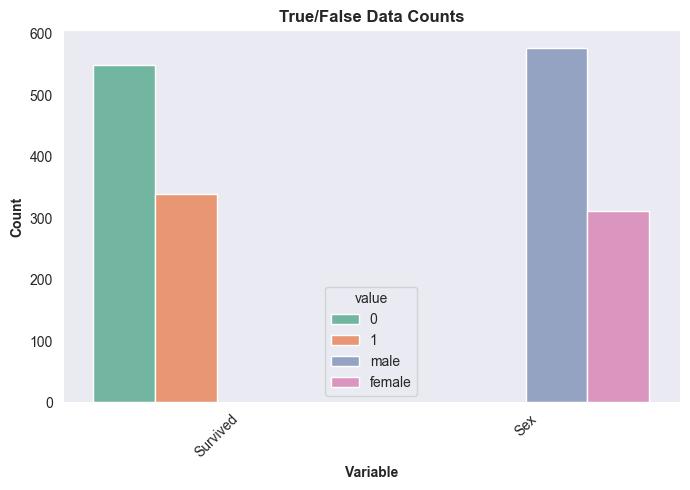

In [26]:
plt.figure(figsize=(7, 5))
cmap = sns.color_palette('Set2')

ax = sns.countplot(data=dff, x='variable', hue='value', palette=cmap)
ax.yaxis.grid()
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Variable', weight='bold')
ax.set_title('True/False Data Counts', weight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

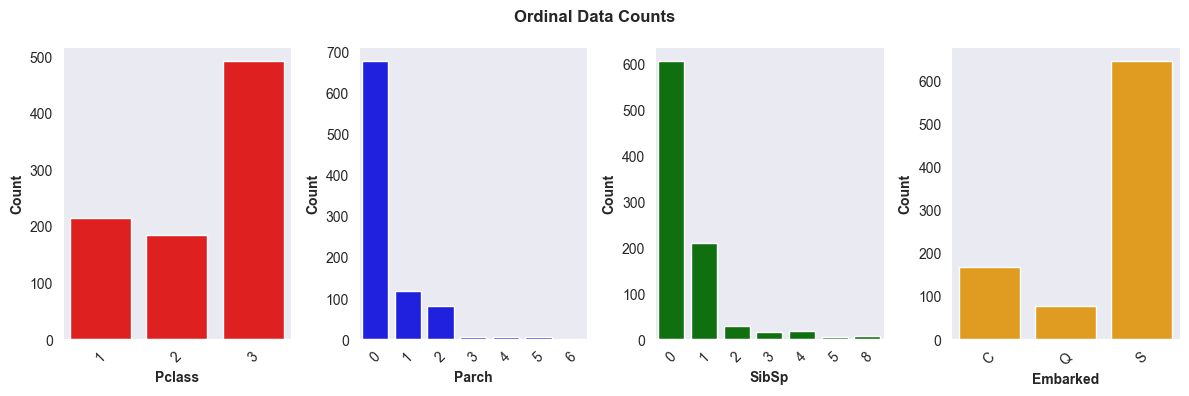

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4))

crs = ['red', 'blue', 'green', 'orange', 'purple']
for i, cc in enumerate(['Pclass', 'Parch', 'SibSp', 'Embarked']):
    ax = sns.countplot(data=train_data, x=cc, ax=axs[i], color=crs[i])
    ax.yaxis.grid()
    ax.set_xlabel(cc, weight='bold')
    ax.set_ylabel('Count', weight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.suptitle('Ordinal Data Counts', weight='bold')
fig.tight_layout()
plt.show()

Continuous Variables
      count       mean        std   min      25%      50%   75%       max
Age   889.0  29.019314  13.209814  0.42  22.0000  26.0000  36.5   80.0000
Fare  889.0  32.096681  49.697504  0.00   7.8958  14.4542  31.0  512.3292
--------------------------------------------------------------------------------
Discrete Variables
Pclass
1    214
2    184
3    491
Name: Pclass, dtype: int64
SibSp
0    606
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
Parch
0    676
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64


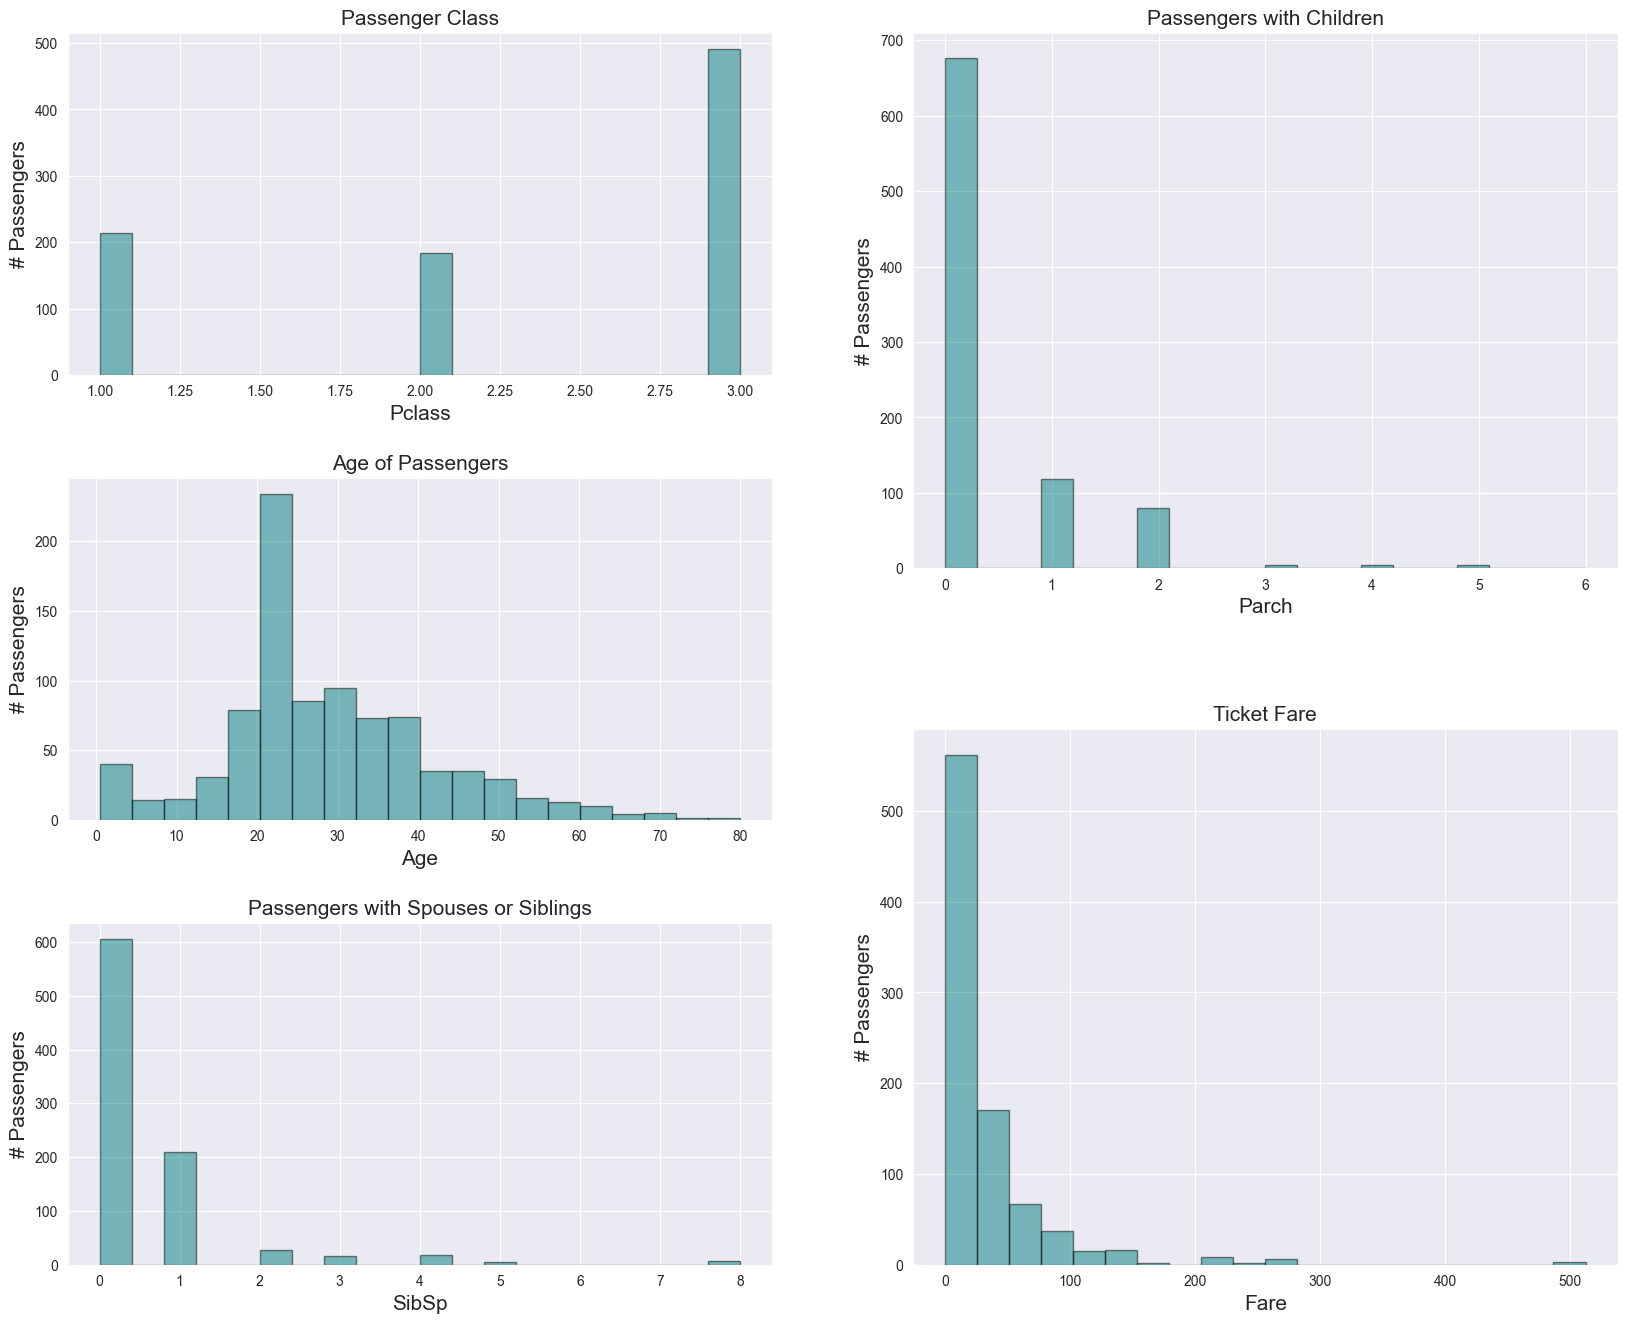

In [28]:
# Identify numeric features
print('Continuous Variables')
print(train_data[['Age','Fare']].describe().transpose())
print('--'*40)
print('Discrete Variables')
print(train_data.groupby('Pclass').Pclass.count())
print(train_data.groupby('SibSp').SibSp.count())
print(train_data.groupby('Parch').Parch.count())

# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(train_data['Pclass'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Pclass', fontsize = 15)
ax1.set_ylabel('# Passengers',fontsize = 15)
ax1.set_title('Passenger Class',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(train_data['Age'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Age',fontsize = 15)
ax2.set_ylabel('# Passengers',fontsize = 15)
ax2.set_title('Age of Passengers',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(train_data['SibSp'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('SibSp',fontsize = 15)
ax3.set_ylabel('# Passengers',fontsize = 15)
ax3.set_title('Passengers with Spouses or Siblings',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(train_data['Parch'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Parch',fontsize = 15)
ax4.set_ylabel('# Passengers',fontsize = 15)
ax4.set_title('Passengers with Children',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(train_data['Fare'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Fare',fontsize = 15)
ax5.set_ylabel('# Passengers',fontsize = 15)
ax5.set_title('Ticket Fare',fontsize = 15)

plt.show()

* Insights de Características Numéricas: 

La mayoría de los pasajeros a bordo eran de tercera clase.
La mayoría eran viajeros solteros, sin cónyuges ni hijos.
La edad de los pasajeros parece tener una distribución bimodal, con un pequeño pico alrededor de los 5 años y un pico más grande alrededor de los 25 años. Esto indica que la edad de los pasajeros a bordo se distribuye hacia individuos más jóvenes, siendo la edad mediana de 26 años.
La mayoría de los precios de los boletos son inferiores a $25, con una tarifa mediana de $14. Sin embargo, los datos están sesgados a la derecha, con valores atípicos de hasta $500.

Passenger Class Summary


Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119


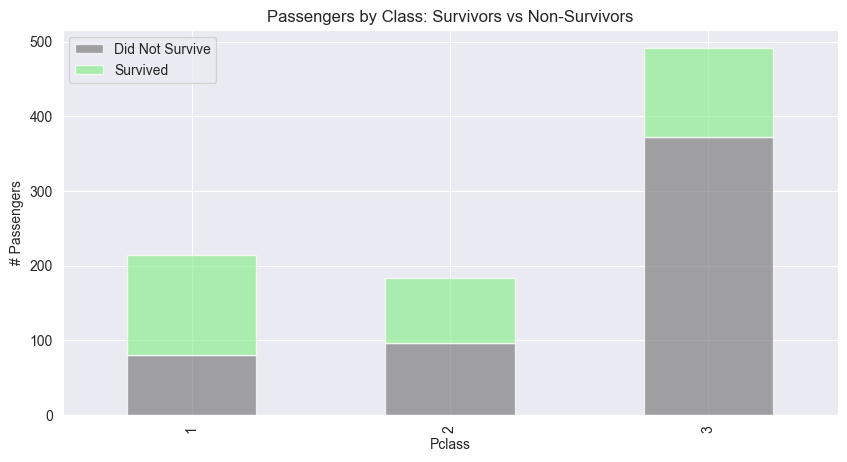

In [29]:
# Passenger class summary
print('Passenger Class Summary')

print('\n')
print(train_data.groupby(['Pclass','Survived']).Pclass.count().unstack())

# Passenger class visualization
pclass = train_data.groupby(['Pclass','Survived']).Pclass.count().unstack()
p1 = pclass.plot(kind = 'bar', stacked = True,
                   title = 'Passengers by Class: Survivors vs Non-Survivors',
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Pclass')
p1.set_ylabel('# Passengers')
p1.legend(['Did Not Survive','Survived'])
plt.show()

Passengers with Siblings or Spouse


Survived      0      1
SibSp                 
0         398.0  208.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN


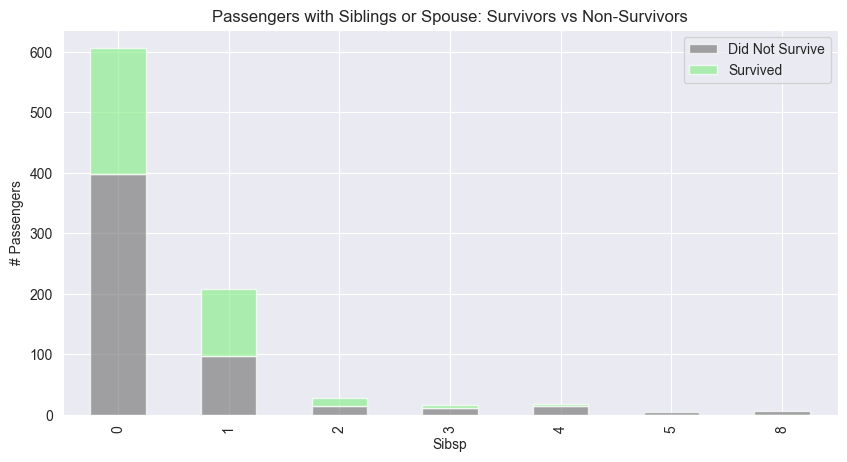

In [30]:
print('Passengers with Siblings or Spouse')
print('\n')
print(train_data.groupby(['SibSp','Survived']).SibSp.count().unstack())

sibsp = train_data.groupby(['SibSp','Survived']).SibSp.count().unstack()
p2 = sibsp.plot(kind = 'bar', stacked = True,
                   color = ['grey','lightgreen'], alpha = .70)
p2.set_title('Passengers with Siblings or Spouse: Survivors vs Non-Survivors')
p2.set_xlabel('Sibsp')
p2.set_ylabel('# Passengers')
p2.legend(['Did Not Survive','Survived'])
plt.show()

Survived      0      1
Parch                 
0         445.0  231.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN


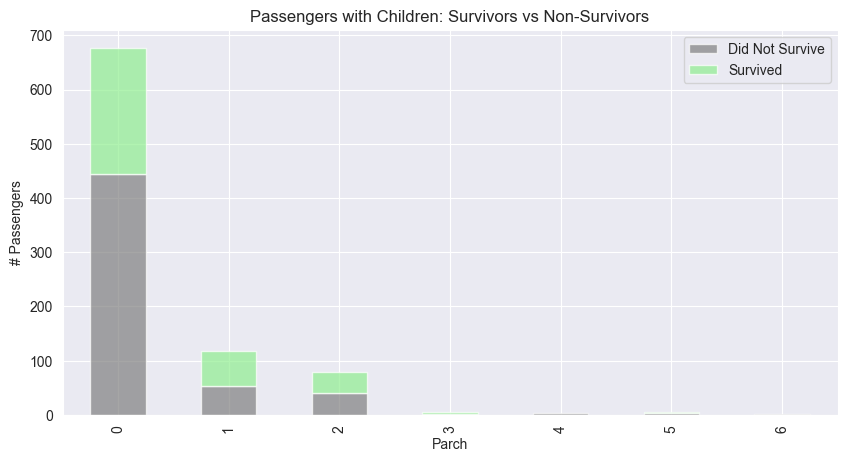

In [31]:
print(train_data.groupby(['Parch','Survived']).Parch.count().unstack())

parch = train_data.groupby(['Parch','Survived']).Parch.count().unstack()
p3 = parch.plot(kind = 'bar', stacked = True,
                   color = ['grey','lightgreen'], alpha = .70)
p3.set_title('Passengers with Children: Survivors vs Non-Survivors')
p3.set_xlabel('Parch')
p3.set_ylabel('# Passengers')
p3.legend(['Did Not Survive','Survived'])
plt.show()

* Insights sobre Pasajeros con Hijos: 


La mayoría de los pasajeros a bordo no tenía hijos.

La mayoría de los pasajeros sin hijos no sobrevivió.

Los pasajeros con uno o dos hijos sobrevivieron en la mitad de los casos.

Statistical Summary of Age and Fare


Did Not Survive
      count       mean        std  min      25%   50%   75%    max
Age   549.0  29.560109  12.778433  1.0  23.0000  25.0  37.0   74.0
Fare  549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0
--------------------------------------------------------------------------------
Survived
      count       mean        std   min       25%   50%      75%       max
Age   340.0  28.146088  13.852728  0.42  21.00000  27.0  36.0000   80.0000
Fare  340.0  48.209498  66.748773  0.00  12.44375  26.0  56.9469  512.3292


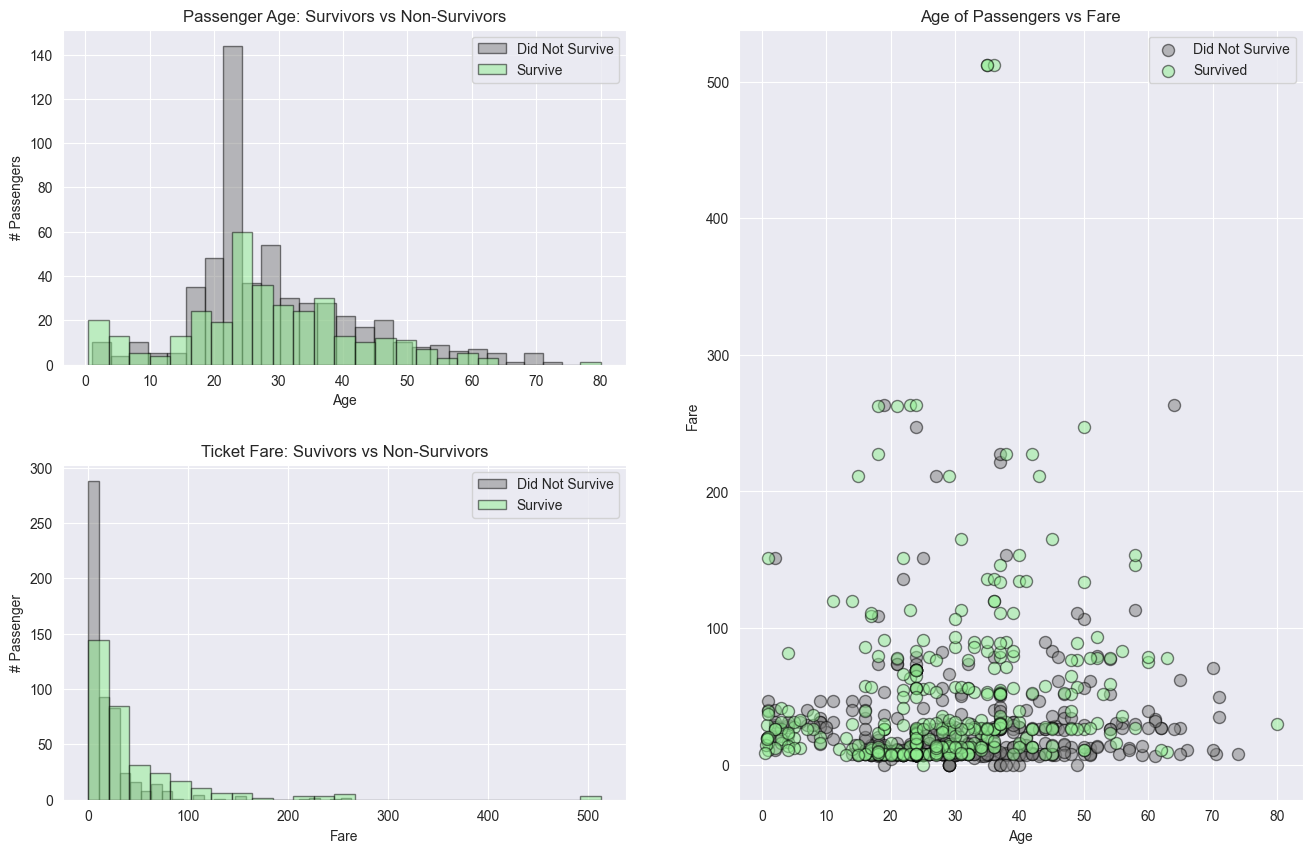

In [32]:
print('Statistical Summary of Age and Fare')
print('\n')
print('Did Not Survive')
print(train_data[train_data['Survived']==0][['Age','Fare']].describe().transpose())
print('--'*40)
print('Survived')
print(train_data[train_data['Survived']==1][['Age','Fare']].describe().transpose())
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(train_data[train_data['Survived'] ==0].Age, bins = 25, label ='Did Not Survive', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(train_data[train_data['Survived']==1].Age, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Passenger Age: Survivors vs Non-Survivors')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Passengers')
ax1.legend(loc = 'upper right')

ax2 = fig.add_subplot(223)
ax2.hist(train_data[train_data['Survived']==0].Fare, bins = 25, label = 'Did Not Survive', alpha = .50, edgecolor ='black', color = 'grey')
ax2.hist(train_data[train_data['Survived']==1].Fare, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax2.set_title('Ticket Fare: Suvivors vs Non-Survivors')
ax2.set_xlabel('Fare')
ax2.set_ylabel('# Passenger')
ax2.legend(loc = 'upper right')

ax3 = fig.add_subplot(122)
ax3.scatter(x = train_data[train_data['Survived']==0].Age, y = train_data[train_data['Survived']==0].Fare,
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Survive')
ax3.scatter(x = train_data[train_data['Survived']==1].Age, y = train_data[train_data['Survived']==1].Fare,
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Survived')
ax3.set_xlabel('Age')
ax3.set_ylabel('Fare')
ax3.set_title('Age of Passengers vs Fare')
ax3.legend()

plt.show()

* Insights de Características Numéricas

La mayoría de los pasajeros menores de 10 años sobrevivieron.

La mayoría de las personas que pagaron más de $100 por su boleto sobrevivieron.

Hubo un menor número de personas que sobrevivieron a partir de los 40 años.

_______

## Features categóricas: 

In [33]:
train_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

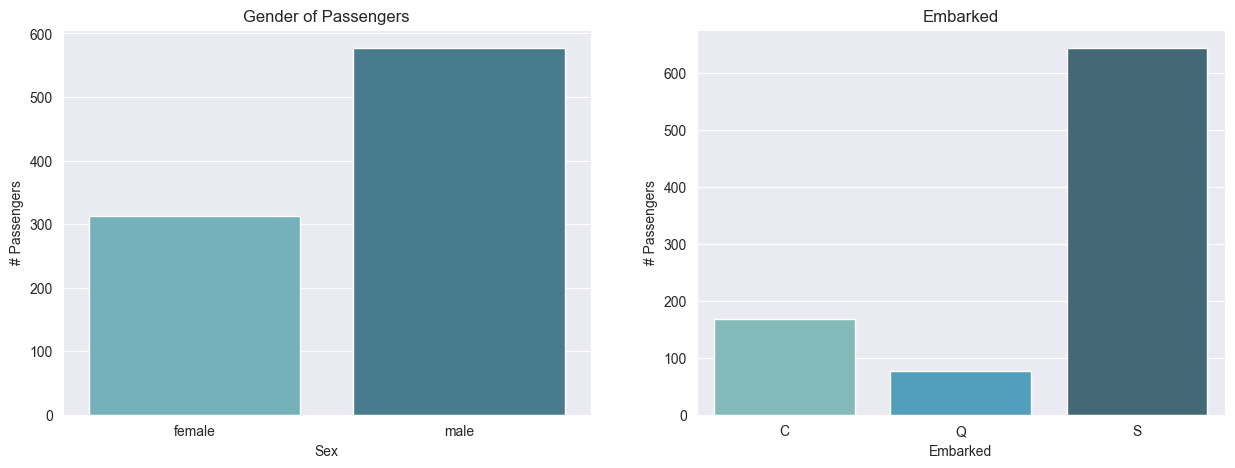

In [34]:
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (15,5))

# Plot [0]
sns.countplot(x = 'Sex', data = train_data, palette = 'GnBu_d', ax = axes[0])
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('# Passengers')
axes[0].set_title('Gender of Passengers')

# Plot [1]
sns.countplot(x = 'Embarked', data = train_data, palette = 'GnBu_d',ax = axes[1])
axes[1].set_xlabel('Embarked')
axes[1].set_ylabel('# Passengers')
axes[1].set_title('Embarked')

plt.show()

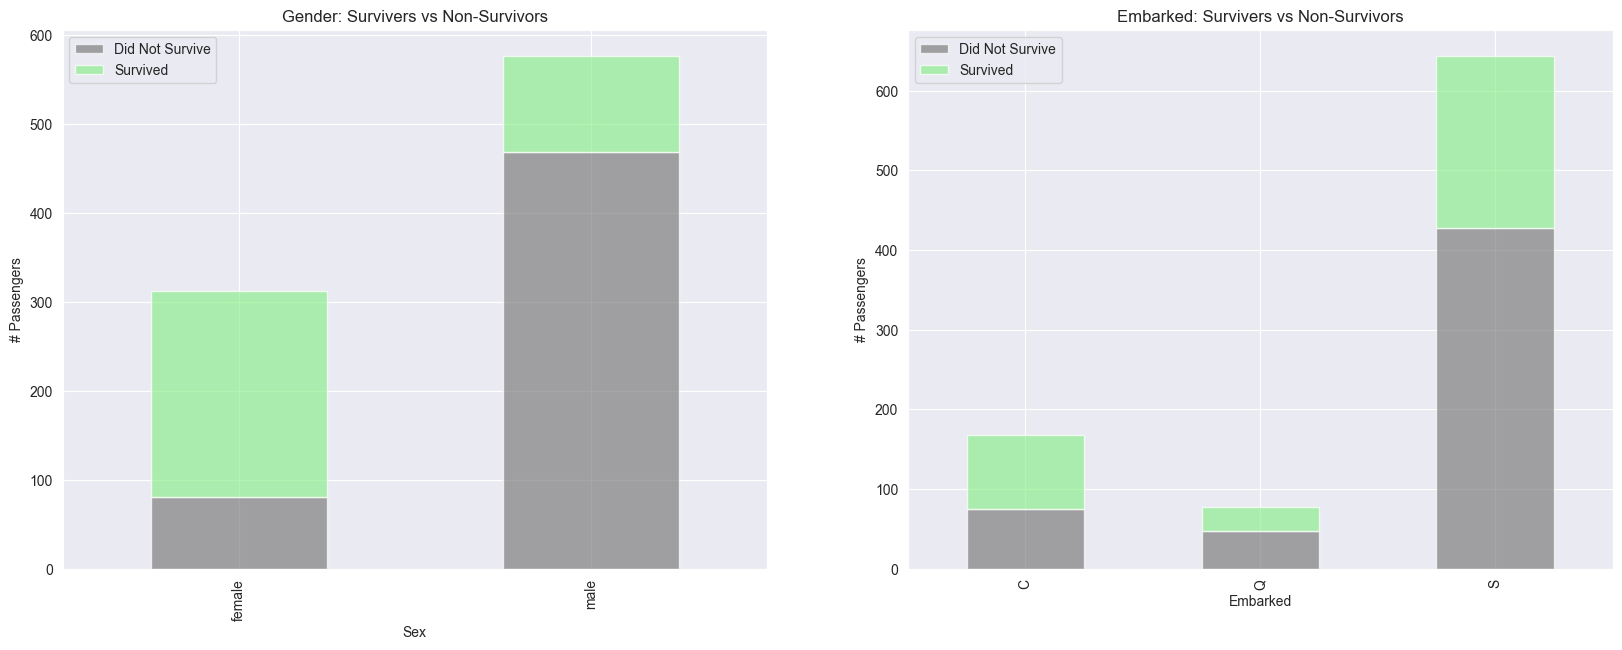

In [35]:
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (20,7))

gender = train_data.groupby(['Sex','Survived']).Sex.count().unstack()
p1 = gender.plot(kind = 'bar', stacked = True,
                   title = 'Gender: Survivers vs Non-Survivors',
                   color = ['grey','lightgreen'], alpha = .70, ax = axes[0])
p1.set_xlabel('Sex')
p1.set_ylabel('# Passengers')
p1.legend(['Did Not Survive','Survived'])


embarked = train_data.groupby(['Embarked','Survived']).Embarked.count().unstack()
p2 = embarked.plot(kind = 'bar', stacked = True,
                    title = 'Embarked: Survivers vs Non-Survivors',
                    color = ['grey','lightgreen'], alpha = .70, ax = axes[1])
p2.set_xlabel('Embarked')
p2.set_ylabel('# Passengers')
p2.legend(['Did Not Survive','Survived'])

plt.show()

__________

## Data processing: 


In [36]:
train_data.shape

(889, 8)

In [37]:
train_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [38]:
sex = pd.get_dummies(train_data['Sex'], drop_first = True) # drop_first prevents multi-collinearity
embarked = pd.get_dummies(train_data['Embarked'], drop_first = True)

In [39]:
# Add new dummy columns to data frame
train_data = pd.concat([train_data, sex, embarked], axis = 1)
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False


In [40]:
# Drop unecessary columns
train_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

# Shape of train data
print('train_data shape',train_data.shape)

# Confirm changes
train_data.head()

train_data shape (889, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [41]:
x = train_data.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = train_data['Survived'] # y is the column we're trying to predict

# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [42]:
x_train.shape, y_train.shape

((711, 8), (711,))

In [43]:
x_test.shape, y_test.shape

((178, 8), (178,))

___________

## Model


In [45]:
# Fit
# Import model
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(x_train, y_train)

LogisticRegression()

In [46]:
y_pred_lreg = lreg.predict(x_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


Logistic Regression


Confusion Matrix
[[99  8]
 [24 47]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.85      0.66      0.75        71

    accuracy                           0.82       178
   macro avg       0.83      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178

--------------------------------------------------------------------------------
Accuracy 82.02 %


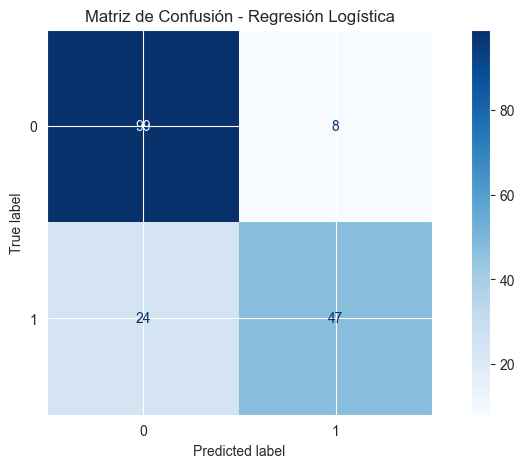

In [48]:
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, y_pred_lreg)
print(conf_matrix)
print('--' * 40)

# Reporte de Clasificación
print('Classification Report')
print(classification_report(y_test, y_pred_lreg))

# Precisión
print('--' * 40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100, 2)
print('Accuracy', logreg_accuracy, '%')

# Graficar la Matriz de Confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

| Métrica             | Clase 0        | Clase 1        | Explicación                                                                                                                            |
|---------------------|----------------|----------------|----------------------------------------------------------------------------------------------------------------------------------------|
| **Precisión**       | 80%            | 85%            | Cuando el modelo dice que ha encontrado un pasajero de la clase 1 (por ejemplo, sobreviviente), tiene razón en el 85% de los casos. Para la clase 0 (no sobrevivientes), tiene razón en el 80% de los casos. |
| **Recuperación**    | 93%            | 66%            | De todos los pasajeros que realmente eran de la clase 0, el modelo identifica correctamente el 93%. Sin embargo, solo identifica el 66% de los pasajeros que realmente eran de la clase 1. Esto significa que se le escapan muchos pasajeros de la clase 1. |
| **F1-Score**        | 86%            | 75%            | Es una forma de combinar precisión y recuperación en una sola medida. La clase 0 tiene un buen balance (86%), pero la clase 1 podría mejorar (75%). |
| **Soporte**         | 107            | 71             | Esto indica cuántos ejemplos hay en cada clase. Hay 107 pasajeros que no sobrevivieron (clase 0) y 71 que sí sobrevivieron (clase 1). Más ejemplos de clase 0 pueden influir en los resultados. |
| **Precisión Global**| 82%            | -              | En general, el modelo toma decisiones correctas el 82% del tiempo. Esto es un buen porcentaje, pero puede mejorarse.                    |
| **Promedio Macro**  | 83%            | 79%            | Un promedio simple de las métricas para ambas clases, sin tener en cuenta cuántos ejemplos hay de cada una. Indica que el modelo funciona bien en general. |
| **Promedio Ponderado** | 82%        | 82%            | Este promedio considera cuántos ejemplos hay de cada clase. Esto significa que el rendimiento del modelo es más equilibrado en general. |

### Resumen:

- **Buena Identificación de No Sobrevivientes (Clase 0)**: El modelo es bastante efectivo en identificar a los pasajeros que no sobrevivieron, acertando en la mayoría de los casos.
- **Mejorar la Identificación de Sobrevivientes (Clase 1)**: El modelo tiene dificultades para identificar a los pasajeros que sobrevivieron. Apunta a un 66% de aciertos, lo que significa que muchos sobrevivientes no fueron detectados.
- **Oportunidades de Mejora**: Se pueden aplicar métodos adicionales para mejorar la identificación de sobrevivientes. Esto incluye ajustar el modelo, utilizar diferentes enfoques o incluso recolectar más datos para ayudar al modelo a aprender mejor.

____________

### K-NEAREST NEIGHBORS


K-Nearest Neighbors (KNN), o "K vecinos más cercanos", es un método que se utiliza para clasificar nuevos datos. Imagina que tienes un conjunto de datos conocido, y ahora quieres clasificar un nuevo punto de datos utilizando lo que ya sabes. KNN lo hace a través de dos pasos sencillos:

Encontrar a los K vecinos más cercanos: Esto significa que el algoritmo buscará los K puntos de datos en tu conjunto que están más cerca del nuevo punto que quieres clasificar. Aquí, "K" es un número que eliges, como 3 o 5.

Votar por la clasificación: Una vez que se han encontrado los vecinos más cercanos, cada uno de ellos "vota" por qué clase o categoría cree que pertenece el nuevo dato. Por ejemplo, si 3 de los 5 vecinos más cercanos son "manzanas" y 2 son "naranjas", el nuevo punto se clasifica como "manzana".

#### ¿Por qué es importante estandarizar los datos?

Cuando se utiliza KNN, es importante que todas las variables (o características) de los datos estén en la misma escala. Esto se debe a que KNN utiliza la "distancia" para encontrar a los vecinos más cercanos, y si tienes una característica que tiene un rango mucho más grande que otra (por ejemplo, la altura en centímetros y el peso en kilogramos), la característica con el rango más grande podría influir más en la distancia que la otra.

* Ejemplo:

Imagina que estás clasificando frutas y tienes dos características: el peso (en gramos) y el color (en un rango del 1 al 10). Si el peso varía entre 100 y 1000 gramos y el color solo entre 1 y 10, el peso tendrá un impacto mucho mayor en la distancia calculada. Esto podría llevar a decisiones incorrectas sobre la clasificación de las frutas. Por eso, es fundamental "estandarizar" los datos, lo que significa convertir todas las características a una escala similar, para que cada una tenga el mismo peso en la clasificación.




In [50]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create instance of standard scaler
scaler = StandardScaler()

# Fit scaler object to feature columns
scaler.fit(train_data.drop('Survived', axis = 1)) # Everything but target variable

# Use scaler object to do a transform columns
scaled_features = scaler.transform(train_data.drop('Survived', axis = 1)) # performs the standardization by centering and scaling
scaled_features

array([[ 0.82520863, -0.53167023,  0.43135024, ...,  0.73534203,
        -0.30794088,  0.61679395],
       [-1.57221121,  0.68023223,  0.43135024, ..., -1.35991138,
        -0.30794088, -1.62128697],
       [ 0.82520863, -0.22869462, -0.47519908, ..., -1.35991138,
        -0.30794088,  0.61679395],
       ...,
       [ 0.82520863, -0.38018243,  0.43135024, ..., -1.35991138,
        -0.30794088,  0.61679395],
       [-1.57221121, -0.22869462, -0.47519908, ...,  0.73534203,
        -0.30794088, -1.62128697],
       [ 0.82520863,  0.22576881, -0.47519908, ...,  0.73534203,
         3.24737656, -1.62128697]], shape=(889, 8))

In [51]:
scaled_features.shape

(889, 8)

In [52]:
# Use scaled features variable to re-create a features dataframe
df_feat = pd.DataFrame(scaled_features, columns = train_data.columns[:-1])

In [53]:
from sklearn.model_selection import train_test_split

# Create matrix of features
x = df_feat

# Create target variable
y = train_data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [54]:
# Import model
from sklearn.neighbors import KNeighborsClassifier

# Create instance of model
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit to training data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
# Predict
y_pred_knn = knn.predict(x_test)

K-Nearest Neighbors (KNN)
k = 1


Confusion Matrix
[[78 29]
 [20 51]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       107
           1       0.64      0.72      0.68        71

    accuracy                           0.72       178
   macro avg       0.72      0.72      0.72       178
weighted avg       0.73      0.72      0.73       178

--------------------------------------------------------------------------------
Accuracy 72.5 %


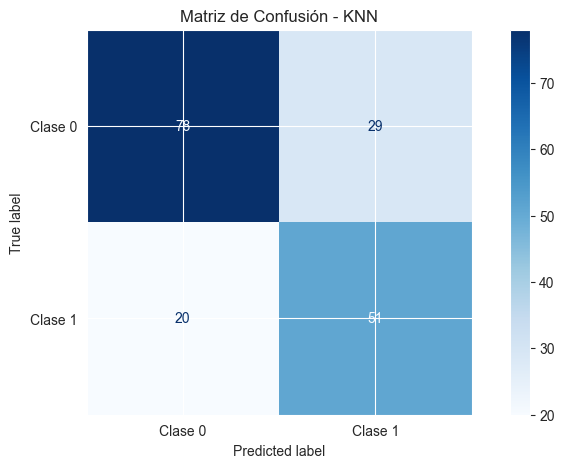

In [56]:
print('K-Nearest Neighbors (KNN)')
print('k = 1')
print('\n')

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Imprimir la matriz de confusión
print('Confusion Matrix')
print(conf_matrix)

# Mostrar el reporte de clasificación
print('--' * 40)
print('Classification Report')
print(classification_report(y_test, y_pred_knn))

# Precisión
print('--' * 40)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn) * 100, 1)
print('Accuracy', knn_accuracy, '%')

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Clase 0', 'Clase 1'])  # Cambia los nombres de las clases según sea necesario
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - KNN')
plt.show()

Elegir un valor adecuado para "k" es crucial, ya que un "k" demasiado pequeño puede hacer que el modelo se sobreajuste a los datos (es decir, que sea muy sensible al ruido en los datos), mientras que un "k" demasiado grande puede hacer que el modelo no capture correctamente las características de los datos.

### Método del "Codo":

La mejor forma de encontrar el valor óptimo de "k" es mediante el método del "Codo". Este método implica lo siguiente:

1 - Probar diferentes valores de k: Se entrena el modelo varias veces, usando diversos valores de k (por ejemplo, k=1, k=2, k=3, hasta k=n).

2 - Calcular la tasa de error: Para cada valor de k, se calcula la tasa de error del modelo (la cantidad de predicciones incorrectas).

3 - Graficar los resultados: Se hacen gráficos que muestran la tasa de error en función de los diferentes valores de k.

4 - Buscar el "codo": Al observar el gráfico, se puede identificar un punto donde la disminución de la tasa de error se desacelera, formando una especie de "codo". Este punto indica el valor de k que proporciona el mejor equilibrio entre precisión y complejidad del modelo.

El objetivo es seleccionar el k que tiene la tasa de error más baja, lo que significa que el modelo es más preciso y generaliza mejor a nuevos datos.



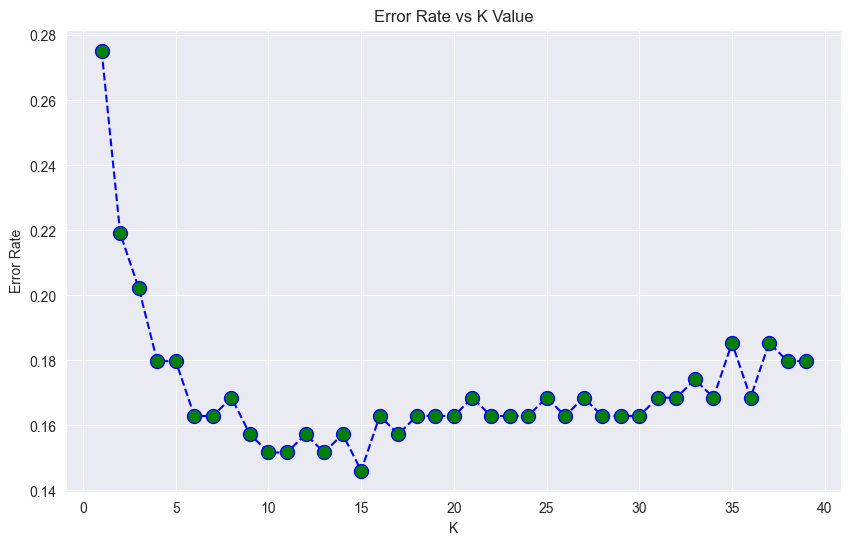

In [57]:
# Function
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o',
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [58]:
knn = KNeighborsClassifier(n_neighbors = 13)

# Fit new KNN on training data
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [60]:
y_pred_knn_op = knn.predict(x_test)

Confusion Matrix
[[100   7]
 [ 20  51]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.88      0.72      0.79        71

    accuracy                           0.85       178
   macro avg       0.86      0.83      0.84       178
weighted avg       0.85      0.85      0.85       178

--------------------------------------------------------------------------------
Accuracy 84.8 %


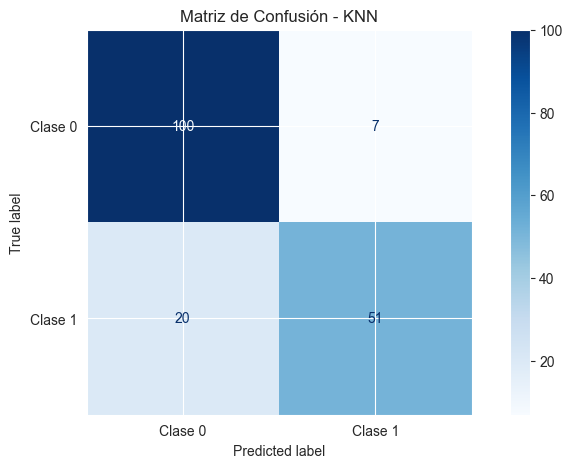

In [62]:

conf_matrix = confusion_matrix(y_test, y_pred_knn_op)

# Imprimir la matriz de confusión
print('Confusion Matrix')
print(conf_matrix)

# Mostrar el reporte de clasificación
print('--' * 40)
print('Classification Report')
print(classification_report(y_test, y_pred_knn_op))

# Precisión
print('--' * 40)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn_op) * 100, 1)
print('Accuracy', knn_accuracy, '%')

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Clase 0', 'Clase 1'])  # Cambia los nombres de las clases según sea necesario
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - KNN')
plt.show()